In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 11.5})

In [2]:
df = pd.read_csv('data/find_best.csv')
df

,pin,size,threads,runtime,runtimesd,energy,energysd
0,True,500,1,0.435036,0.002639,6.512120,0.194206
1,True,500,2,0.217731,0.000103,3.956866,0.018327
2,True,500,3,0.151589,0.011086,3.272400,0.124653
3,True,500,4,0.109997,0.001084,2.769741,0.032821
4,True,500,5,0.105996,0.001618,2.725493,0.023273
...,...,...,...,...,...,...,...
347,False,1500,12,1.874788,0.041207,75.853806,0.867650
348,False,1500,13,1.863607,0.025539,76.613083,1.090468
349,False,1500,14,1.970510,0.021344,80.001160,0.853985
350,False,1500,15,2.106200,0.020552,84.203621,0.702778


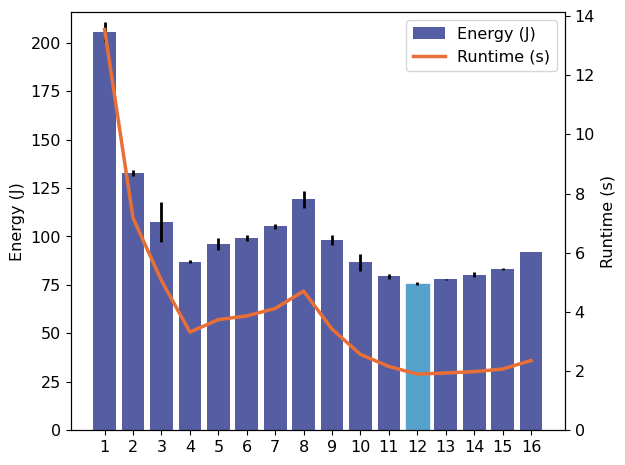

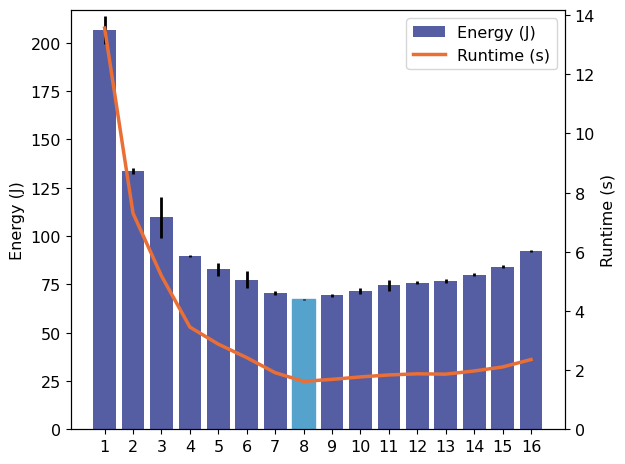

In [3]:
pal = sns.color_palette(palette='icefire')
pal_energy      = pal[1]
pal_energy_best = pal[0]
pal_runtime     = pal[5]

def twin_plot(df, title):
    x = list(range(0, len(df)))
    
    ax = sns.barplot(x=[x+1 for x in x], y=df['energy'], label='Energy (J)', legend=False, color=pal_energy)
    axt = ax.twinx()
    sns.lineplot(x=x, y=df['runtime'], label='Runtime (s)', legend=False, linewidth=2.5, color=pal_runtime, ax=axt)

    ax.set_ylim((0,None))
    axt.set_ylim((0,None))

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = axt.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2)

    ax.errorbar(x=x, y=df['energy'], yerr=df['energysd'], fmt='none', c='black', linewidth=2)

    for bar in ax.patches:
        if bar.get_height() == df['energy'].min():
            bar.set_color(pal_energy_best)
            break

    #ax.set_title(title)
    ax.set_ylabel('Energy (J)')
    axt.set_ylabel('Runtime (s)')

fig = plt.figure()
df1500_t = df[(df['pin'] == True) & (df['size'] == 1500)]
twin_plot(df1500_t, '1500x1500 matrix multiplication with pinning')
fig.tight_layout()
plt.savefig('images/rust_1500_pin.png')
plt.show()

fig = plt.figure()
df1500_f = df[(df['pin'] == False) & (df['size'] == 1500)]
twin_plot(df1500_f, '1000x1000 matrix multiplication without pinning')
fig.tight_layout()
plt.savefig('images/rust_1500_free.png')
plt.show()

/tmp/ipykernel_289823/3610875401.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(8,6))


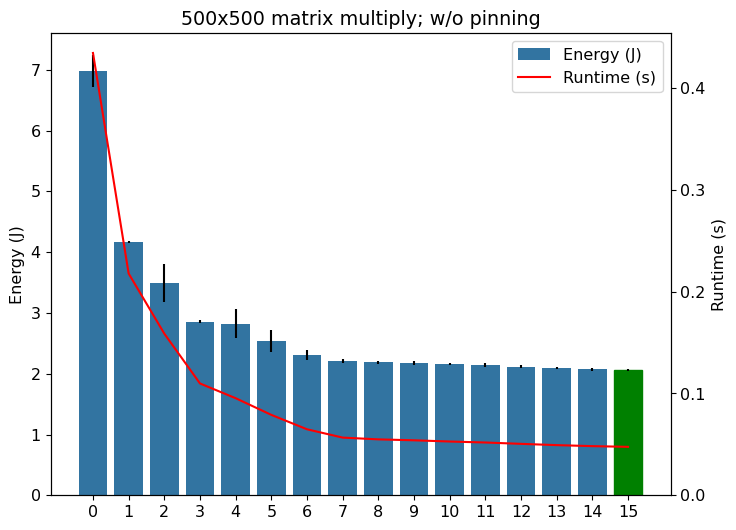

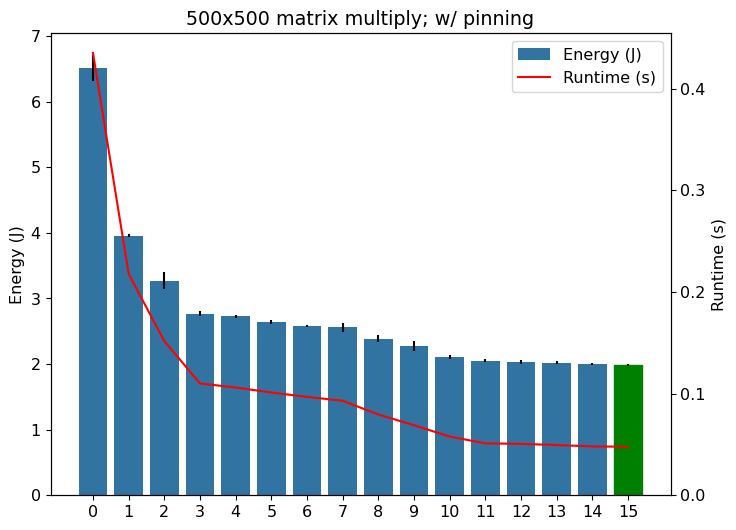

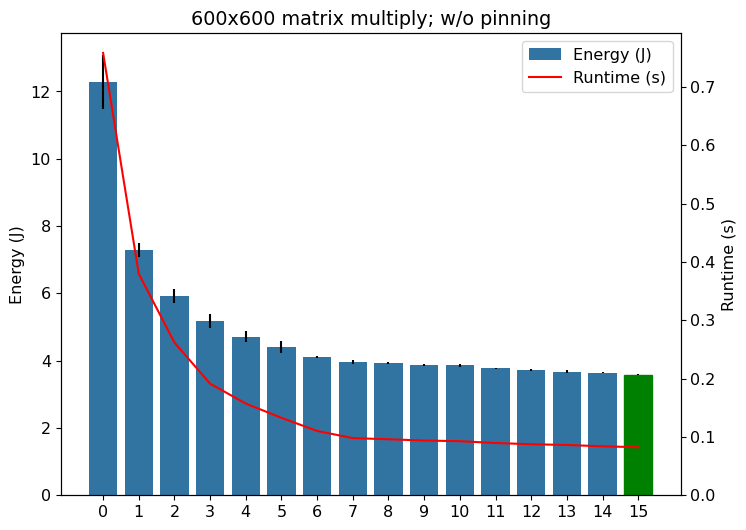

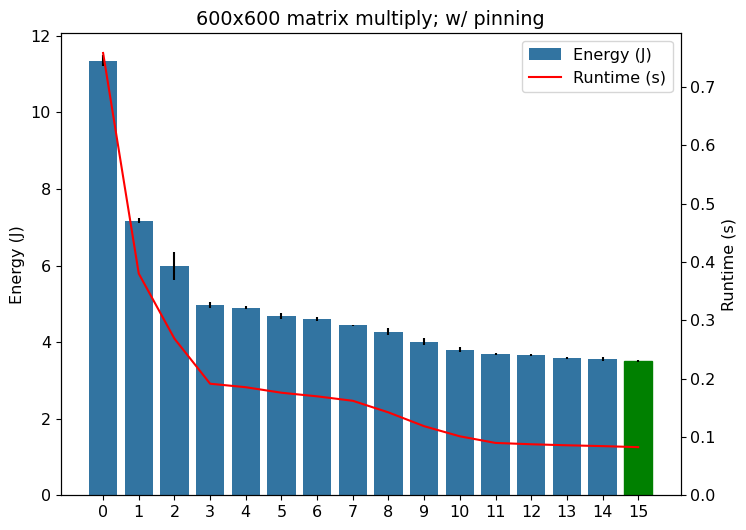

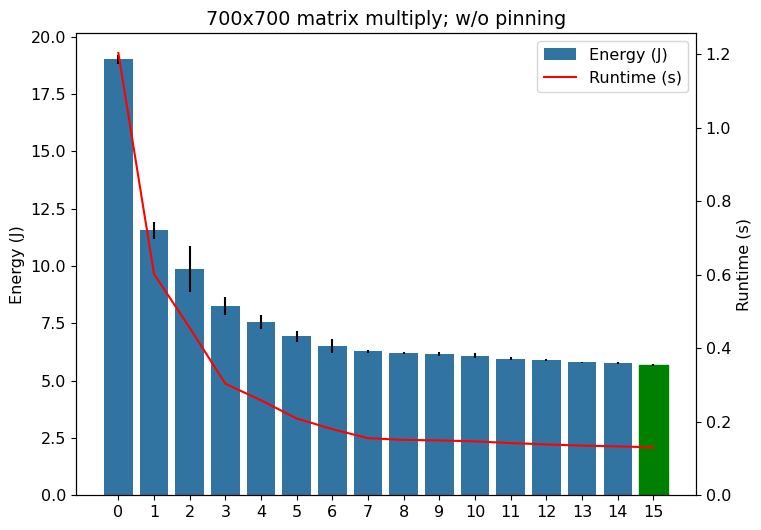

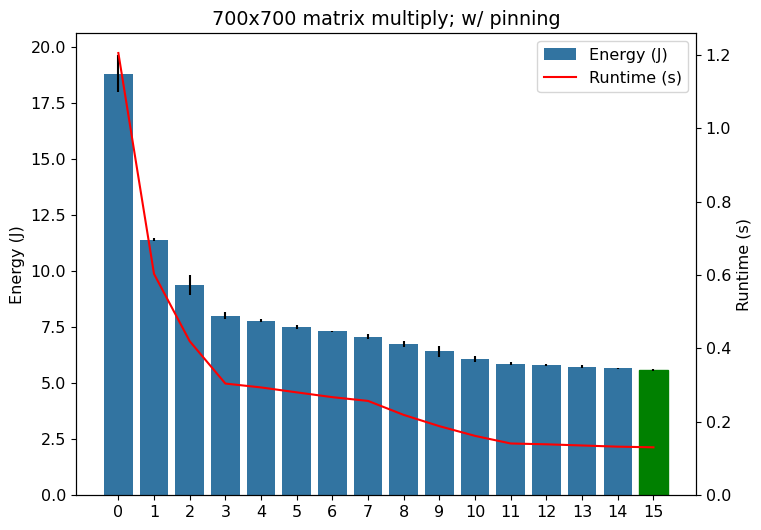

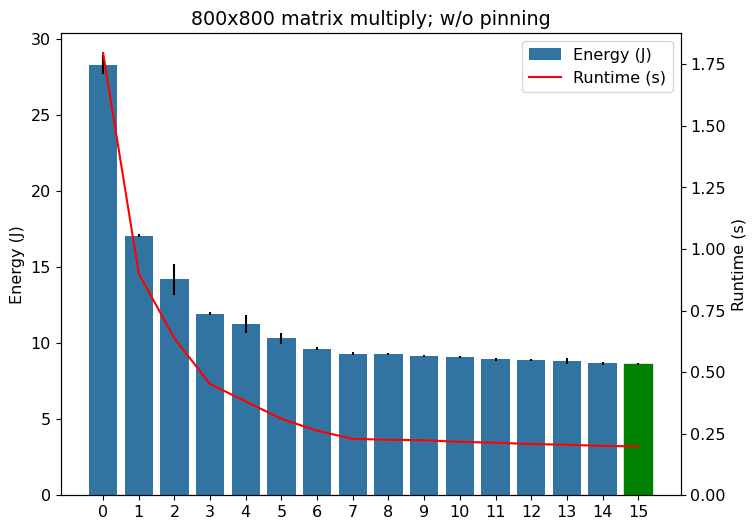

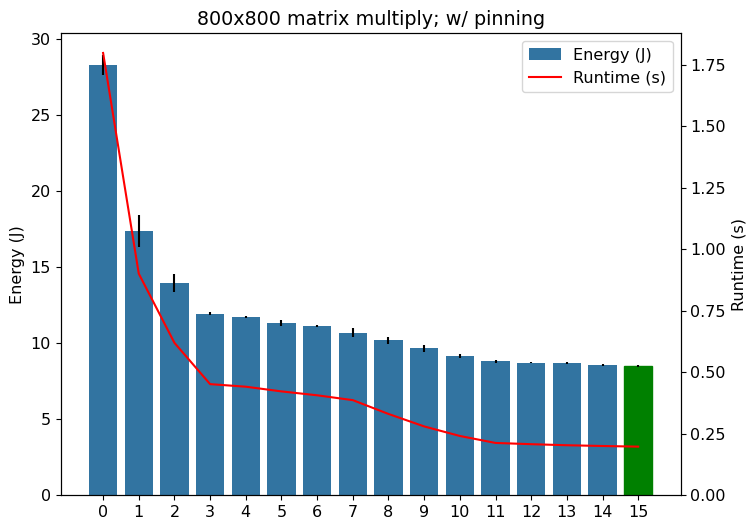

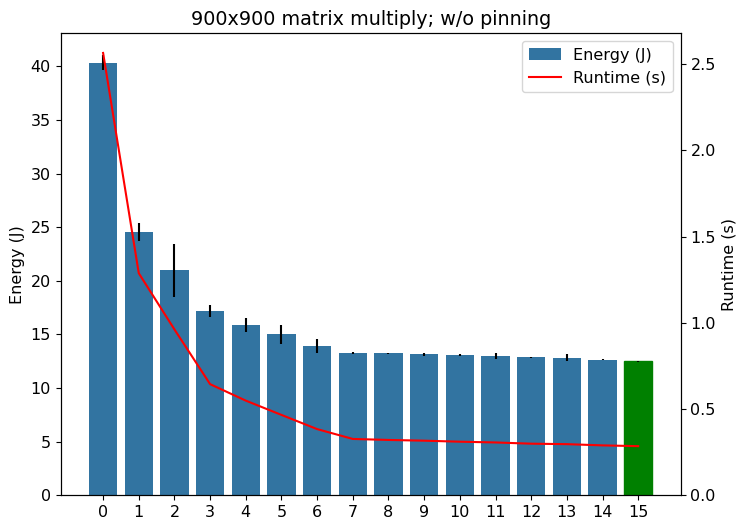

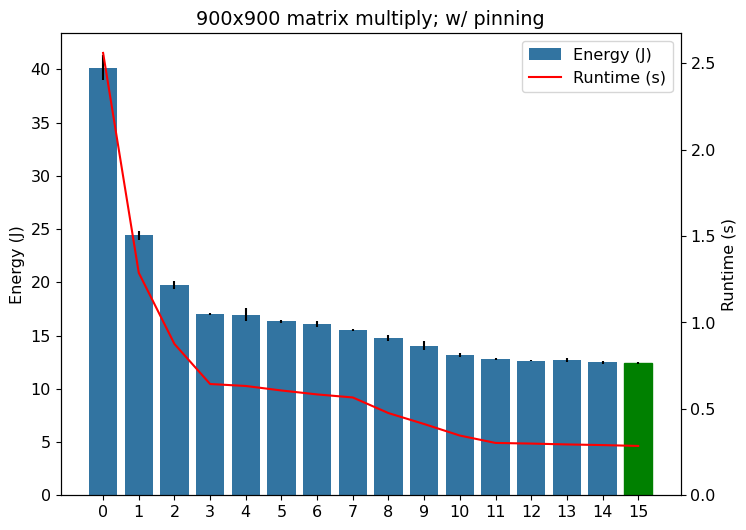

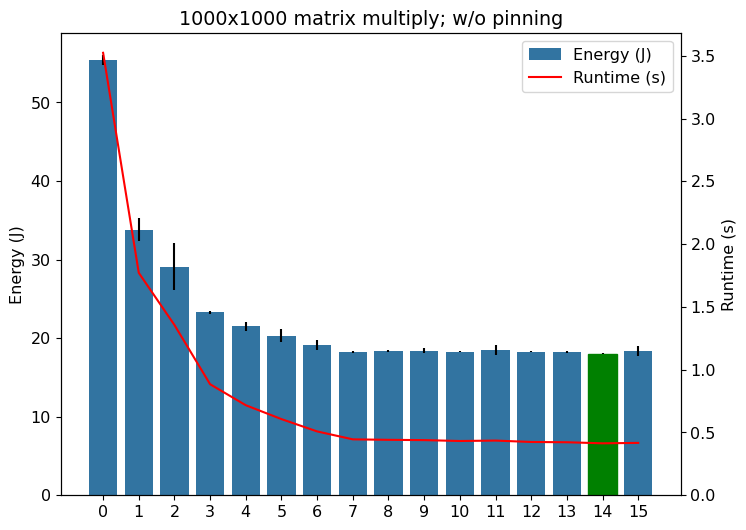

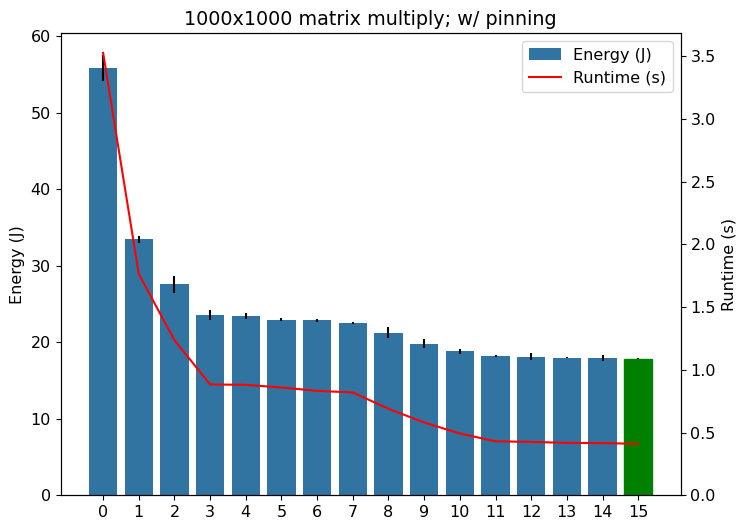

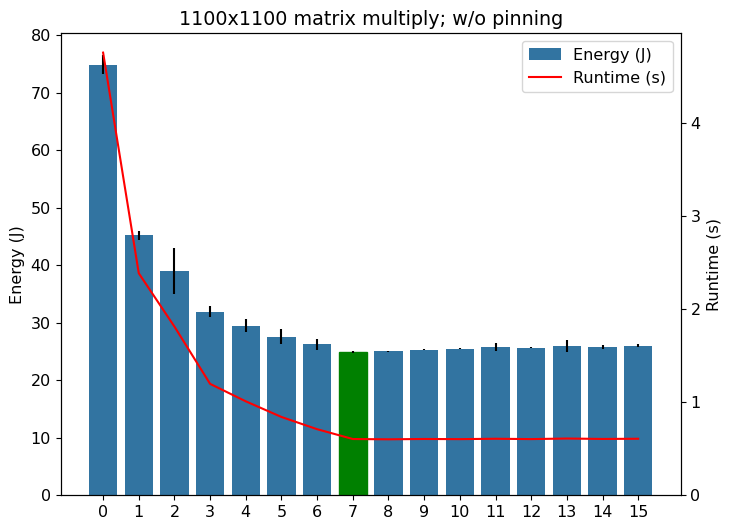

In [ ]:
df_grouped = df.groupby(['size', 'pin'])

for (size, pin), dfx in df_grouped:
    fig = plt.figure(figsize=(8,6))
    fig.tight_layout()

    x = list(range(0, len(dfx)))
    
    ax = sns.barplot(x=x, y=dfx['energy'], label='Energy (J)', legend=False)
    ax2 = ax.twinx()
    sns.lineplot(x=x, y=dfx['runtime'], label='Runtime (s)', legend=False, color='r', ax=ax2)

    ax.set_title(f'{size}x{size} matrix multiply; {'w/' if pin else 'w/o'} pinning')
    ax.set_ylabel('Energy (J)')
    ax2.set_ylabel('Runtime (s)')
    ax2.set_ylim((0,None))

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2)

    ax.errorbar(x=x, y=dfx['energy'], yerr=dfx['energysd'], fmt='none', c='black')

    for bar in ax.patches:
        if bar.get_height() == dfx['energy'].min():
            bar.set_color('g')
            break

plt.show()